In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import scipy.optimize
from scipy.integrate import odeint

Code adapted from https://github.com/mikesaint-antoine/Comp_Bio_Tutorials/blob/main/parameter_estimation/predator_prey/fit_model.py

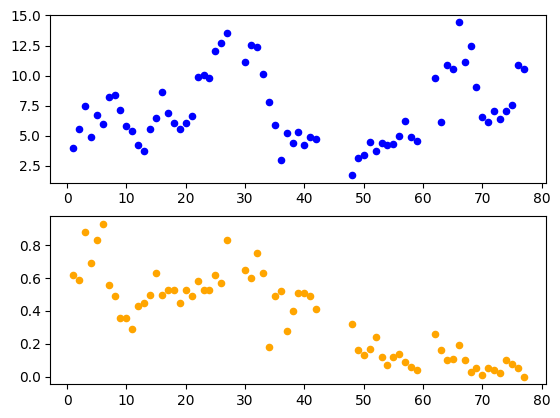

In [58]:
#Read data from adjusted csv of data courtesy of https://www.sciencebase.gov/catalog/item/64502688d34e45f6ddcf0456
months = []
snakes_cpue = []
lizards_cpue = []

with open("/content/Monthly_Captures_Snake_Lizard4.csv") as file:

    reader = csv.reader(file, delimiter=',')

    # skip header line
    next(reader)

    for row in reader:
        months.append(float(row[0]))
        lizards_cpue.append(float(row[11]))
        snakes_cpue.append(float(row[8]))

#Plot the data as a scatter plot with optional labels
f,(ax1,ax2) = plt.subplots(2)

line1 = ax1.scatter(months,lizards_cpue, s=20, c="b")
line2 = ax2.scatter(months,snakes_cpue, s=20, c="orange")

#Set labels for your axes
#ax1.set_ylabel("Lizards (Sightings per km)")
#ax2.set_ylabel("Snakes (Sightings per km)")
#ax2.set_xlabel("Time (Months)")

# plt.show()


In [ ]:
def sim(variables, t, params):

    # lizard population level
    x = variables[0]

    # snake population level
    y = variables[1]


    alpha = params[0]
    beta = params[1]
    delta = params[2]
    gamma = params[3]

    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y

    return([dxdt, dydt])



In [ ]:
def loss_function(params, months, lizards_cpue, snakes_cpue):

    y0 = [lizards_cpue[0], snakes_cpue[0]]

    t = np.linspace(months[0], months[-1], num=len(months))

    output = odeint(sim, y0, t, args=(params,))

    loss = 0

    for i in range(len(months)):
        data_lizards = lizards_cpue[i]
        model_lizards = output[i,0]

        data_snakes = snakes_cpue[i]
        model_snakes = output[i,1]

        res = (data_lizards - model_lizards)**2 + (data_snakes - model_snakes)**2

        loss += res

    return(loss)



In [ ]:

params0 = np.array([1,1,1,1])
minimum = scipy.optimize.fmin(loss_function, params0, args=(months,lizards_cpue, snakes_cpue))

print(minimum)

alpha_fit = minimum[0]
beta_fit = minimum[1]
delta_fit = minimum[2]
gamma_fit = minimum[3]

params = [alpha_fit, beta_fit, delta_fit, gamma_fit]

y0 = [lizards_cpue[0], snakes_cpue[0]]


t = np.linspace(months[0], months[-1], num=1000)

output = odeint(sim, y0, t, args=(params,))



/usr/local/lib/python3.10/dist-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Optimization terminated successfully.
         Current function value: 356.597862
         Iterations: 184
         Function evaluations: 332
[0.03498935 0.10899577 0.21641886 1.46321605]


Creating ODE and phase graphs using code from https://scientific-python.readthedocs.io/en/latest/notebooks_rst/3_Ordinary_Differential_Equations/02_Examples/Lotka_Volterra_model.html

In [ ]:
from scipy import integrate
import ipywidgets as ipw


In [ ]:
alpha = alpha_fit #maximum growth of lizards
beta = beta_fit #death due to predator eating prey
delta = delta_fit #presence of prey on predators growth rate
gamma = gamma_fit #natural death rate of predators
x0 = 3.95 # initial condition from the csv file
y0 = 0.62 #initial condition from the csv file

def derivative(X, t, alpha, beta, delta, gamma):
    x, y = X
    dotx = x * (alpha - beta * y)
    doty = y * (delta * x - gamma)
    return np.array([dotx, doty])

In [ ]:
Nt = 1005 #timepoints taken between 0 and tmax
tmax = 77. #month max from CSV file
t = np.linspace(0.,tmax, Nt)
X0 = [x0, y0]
res = integrate.odeint(derivative, X0, t, args = (alpha, beta, delta, gamma))
x, y = res.T

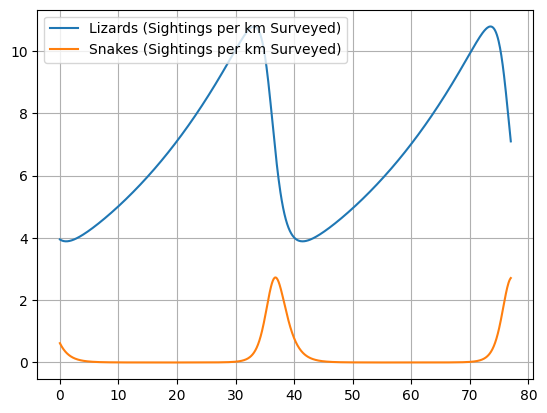

In [ ]:
#Plot with options to add title and labels
plt.figure()
plt.grid()
#plt.title("Lotka-Volterra ODE Method")
plt.plot(t, x, '-', label = "Lizards (Sightings per km Surveyed)")
plt.plot(t, y, '-', label = "Snakes (Sightings per km Surveyed)")
#plt.xlabel('Time (Months)')
#plt.ylabel('Population')
plt.legend()

plt.show()

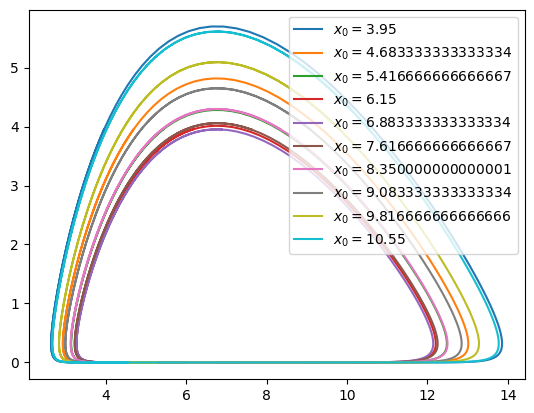

In [ ]:
#Phase diagram with optional labels showing how changing initial conditions impact growth over time

plt.figure()
IC = np.linspace(3.95, 10.55, 10) # initial conditions for lizard population (prey)
for lizard_cpue in IC:
    X0 = [lizard_cpue, 3.95]
    Xs = integrate.odeint(derivative, X0, t, args = (alpha, beta, delta, gamma))
    plt.plot(Xs[:,0], Xs[:,1], "-", label = "$x_0 =$"+str(X0[0]))
#plt.xlabel("Lizards")
#plt.ylabel("Snakes")
plt.legend()
#plt.title("Lizards vs Snakes");